## Nhận diện chó mèo

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

### Tiền xử lý dữ liệu

In [3]:
# load ảnh, chia loại, dịnh lại cỡ ảnh , rescale ảnh
train_datagen = ImageDataGenerator(rescale=1./255,
                                #    shear_range= 0.2,
                                #    zoom_range=0.2,
                                #    horizontal_flip=True
                                )
training_set = train_datagen.flow_from_directory("Cat and Dog/training_set",
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 8005 images belonging to 2 classes.


In [4]:
# load anh, chia loai, dinh lai co anh, rescale anh
test_datage = ImageDataGenerator(rescale=1./255)
test_set = test_datage.flow_from_directory("Cat and Dog/test_set",
                                           target_size=(64,64),
                                           batch_size=32,
                                           class_mode='binary',
                                           shuffle=False)


Found 2023 images belonging to 2 classes.


In [5]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

## Tạo model CNN


In [6]:
# Tạo model
model = Sequential()

# thêm layer
model.add(Conv2D(32, kernel_size=3, 
                 activation='relu', 
                 input_shape = (64,64,3), padding='same'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               9

In [7]:
# Thiết lập thông số
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

### Training

In [8]:
model.fit(x= training_set, validation_data=test_set, epochs=25)

Epoch 1/25
251/251 [==============================] - 25s 99ms/step - loss: 0.6328 - accuracy: 0.6329 - val_loss: 0.5850 - val_accuracy: 0.6851
Epoch 2/25
251/251 [==============================] - 23s 90ms/step - loss: 0.5165 - accuracy: 0.7449 - val_loss: 0.5400 - val_accuracy: 0.7331
Epoch 3/25
251/251 [==============================] - 22s 88ms/step - loss: 0.4480 - accuracy: 0.7906 - val_loss: 0.4991 - val_accuracy: 0.7603
Epoch 4/25
251/251 [==============================] - 22s 89ms/step - loss: 0.3993 - accuracy: 0.8134 - val_loss: 0.5435 - val_accuracy: 0.7479
Epoch 5/25
251/251 [==============================] - 22s 87ms/step - loss: 0.3506 - accuracy: 0.8427 - val_loss: 0.5606 - val_accuracy: 0.7504
Epoch 6/25
251/251 [==============================] - 22s 87ms/step - loss: 0.2851 - accuracy: 0.8781 - val_loss: 0.5565 - val_accuracy: 0.7563
Epoch 7/25
251/251 [==============================] - 22s 88ms/step - loss: 0.2319 - accuracy: 0.9027 - val_loss: 0.6145 - val_accuracy:

In [9]:
model.evaluate(test_set)

64/64 [==============================] - 3s 39ms/step - loss: 1.7868 - accuracy: 0.7672


[1.7867659330368042, 0.7671774625778198]

### Kiểm thử

In [10]:
y_pred = model.predict_generator(test_set)
y_pred

C:\Users\phanp\AppData\Local\Temp\ipykernel_28548\2340990445.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_set)


array([[9.9999994e-01],
       [1.2683154e-02],
       [1.2568875e-10],
       ...,
       [1.1266173e-04],
       [1.3712544e-10],
       [1.0000000e+00]], dtype=float32)

In [11]:
y_pred_class = y_pred >0.5
y_pred_class

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [12]:
test_set.classes

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
from sklearn.metrics import  classification_report
print(classification_report(test_set.classes, y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1011
           1       0.78      0.75      0.76      1012

    accuracy                           0.77      2023
   macro avg       0.77      0.77      0.77      2023
weighted avg       0.77      0.77      0.77      2023



### Dự đoán một số ảnh

1/1 [==============================] - 0s 19ms/step
Cat


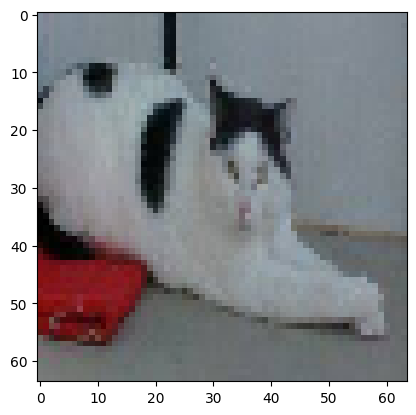

In [35]:

import keras.utils as image
test_image = image.load_img("Cat and Dog/test_set/cats/cat.4022.jpg", target_size = (64,64))
test_image= image.img_to_array(test_image)
plt.imshow(test_image/255)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print('Cat' if result == False else 'Dog')

1/1 [==============================] - 0s 26ms/step
Dog


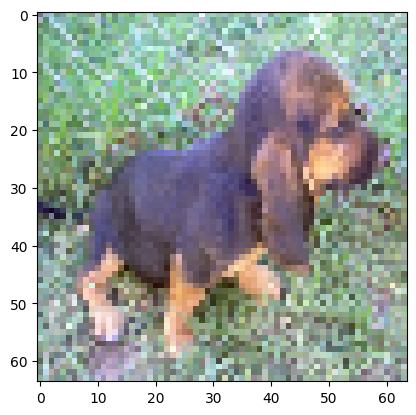

In [32]:
test_image2 = image.load_img("Cat and Dog/test_set/dogs/dog.4009.jpg", target_size = (64,64))
test_image2= image.img_to_array(test_image2)
plt.imshow(test_image2/255)
test_image2 = np.expand_dims(test_image2, axis=0)
result = model.predict(test_image2)
print('Cat' if result == False else 'Dog')